In [2]:
import pandas as pd
import numpy as np
import warnings

In [4]:
beml = pd.read_csv('BEML.csv')
beml.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [5]:
beml.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [43]:
glaxo = pd.read_csv('GLAXO.csv')
glaxo.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [44]:
beml = beml[['Date','Close']]
glaxo = glaxo[['Date', 'Close']]

In [46]:
glaxo  = glaxo.set_index(pd.DatetimeIndex(glaxo['Date']))
beml = beml.set_index(pd.DatetimeIndex(beml['Date']))

In [21]:
glaxo.head()

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80


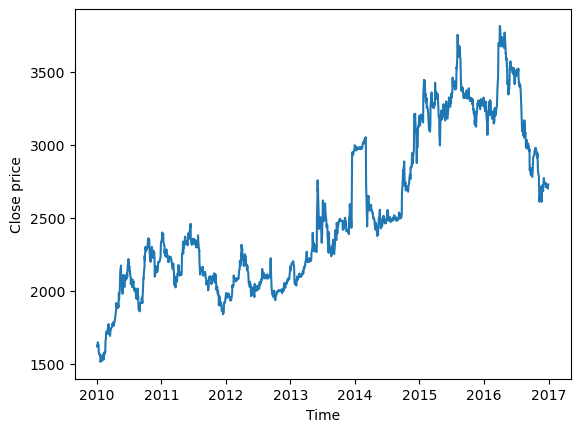

In [47]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

plt.plot(glaxo.Close);
plt.xlabel('Time');
plt.ylabel('Close price');

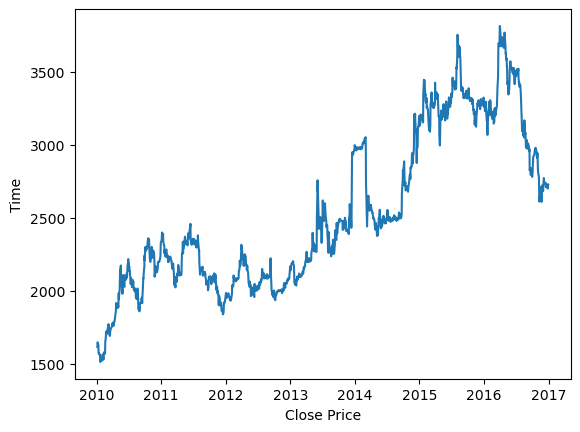

In [48]:
plt.plot(beml.Close);
plt.xlabel('Close Price');
plt.ylabel('Time');

In [74]:
glaxo['gain'] = glaxo.Close.pct_change(periods = 1)
beml['gain'] = beml.Close.pct_change(periods = 1)
# glaxo.head()
beml.head()

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,NaN
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312


In [75]:
glaxo = glaxo.dropna()
beml = glaxo.dropna()

In [76]:
glaxo.gain.describe()

count    1737.000000
mean        0.000389
std         0.013364
min        -0.074719
25%        -0.005852
50%        -0.000020
75%         0.005829
max         0.189196
Name: gain, dtype: float64

In [77]:
beml.gain.describe()

count    1737.000000
mean        0.000389
std         0.013364
min        -0.074719
25%        -0.005852
50%        -0.000020
75%         0.005829
max         0.189196
Name: gain, dtype: float64

In [78]:
from scipy import stats
glaxo_ci = stats.norm.interval(0.95,loc = glaxo.gain.mean(),scale = glaxo.gain.std())
print("Gain at 95% confidence interval is:",np.round(glaxo_ci,4))

Gain at 95% confidence interval is: [-0.0258  0.0266]


In [79]:
beml_ci = stats. norm.interval(0.95,  
loc=beml.gain.mean(),  
scale=beml.gain.std())
print("Gain at 95% confidence interval is:",np.round(beml_ci,4))

Gain at 95% confidence interval is: [-0.0258  0.0266]
